In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/var/folders/z1/2gclrh7s5_56l2ndhf0qrc4m0000gn/T/ipykernel_79520/3716076220.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

In [3]:
df = pd.read_csv('life_expectancy.csv') 
df

,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)",...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.504050,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.806550,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.109050,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.411550,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.714050,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,Zimbabwe,2017,8.061880,63.848396,8.461690,27.01627,0.673026,12.039037,11.853943,80.285,...,27.979,102.2,122.177,62.092,60.084,8.266,60.7095,464.979,-59.918,-4.054
6204,Zimbabwe,2018,8.178377,65.714286,8.585395,27.01627,0.821010,12.154317,11.981767,80.309,...,27.956,102.3,120.252,60.873,59.379,7.972,61.4141,468.496,-59.918,-3.972
6205,Zimbabwe,2019,8.296558,65.428571,8.710909,28.76901,0.747610,12.270700,12.110969,80.339,...,27.934,102.3,123.744,63.152,60.592,8.043,61.2925,469.639,-59.918,-3.895
6206,Zimbabwe,2020,8.296558,65.428571,8.710909,28.76901,0.708562,12.270700,12.110969,78.980,...,27.916,102.4,127.551,66.267,61.284,8.132,61.1242,471.214,-29.955,-1.910


In [4]:
column_list = df.columns.to_list()
for i in column_list:
    print(i)

Country
Year
Mean Years of Schooling, female (years)
Share of seats in parliament, male (% held by men)
Mean Years of Schooling (years)
Inequality in income
Carbon dioxide emissions per capita (production) (tonnes)
Expected Years of Schooling, male (years)
Expected Years of Schooling (years)
Labour force participation rate, female (% ages 15 and older)
Population with at least some secondary education, female (% ages 25 and older)
Expected Years of Schooling, female (years)
Adolescent Birth Rate (births per 1,000 women ages 15-19)
Material footprint per capita (tonnes)
Mean Years of Schooling, male (years)
Population with at least some secondary education, male (% ages 25 and older)
Share of seats in parliament, female (% held by women)
Inequality in eduation
Gender Development Index (value)
Coefficient of human inequality
Labour force participation rate, male (% ages 15 and older)
Human Development Index (value)
Gross National Income Per Capita (2017 PPP$)
Total Population, as of 1 Ja

In [5]:
df.columns = df.columns.str.lower()
# Dictionary mapping old column names to new column names
column_rename_dict = {
    'country': 'country',
    'year': 'year',
    'mean years of schooling, female (years)': 'mean_years_of_schooling_female',
    'share of seats in parliament, male (% held by men)': 'share_of_male_seats_in_parliament',
    'mean years of schooling (years)': 'mean_years_of_schooling',
    'inequality in income': 'income_inequality',
    'carbon dioxide emissions per capita (production) (tonnes)': 'co2_emissions_per_capita_tonnes',
    'expected years of schooling, male (years)': 'expected_years_of_schooling_male',
    'expected years of schooling (years)': 'expected_years_of_schooling',
    'labour force participation rate, female (% ages 15 and older)': 'female_labour_force_participation_rate',
    'population with at least some secondary education, female (% ages 25 and older)': 'female_population_with_some_secondary_education',
    'expected years of schooling, female (years)': 'expected_years_of_schooling_female',
    'adolescent birth rate (births per 1,000 women ages 15-19)': 'adolescent_birth_rate_per_1000_women_ages_15_19',
    'material footprint per capita (tonnes)': 'material_footprint_per_capita_tonnes',
    'mean years of schooling, male (years)': 'mean_years_of_schooling_male',
    'population with at least some secondary education, male (% ages 25 and older)': 'male_population_with_some_secondary_education',
    'share of seats in parliament, female (% held by women)': 'share_of_female_seats_in_parliament',
    'inequality in eduation': 'education_inequality',
    'gender development index (value)': 'gender_development_index',
    'coefficient of human inequality': 'coefficient_of_human_inequality',
    'labour force participation rate, male (% ages 15 and older)': 'male_labour_force_participation_rate',
    'human development index (value)': 'human_development_index',
    'gross national income per capita (2017 ppp$)': 'gross_national_income_per_capita_2017_ppp',
    'total population, as of 1 january (thousands)': 'total_population_as_of_january_1st_thousands',
    'total population, as of 1 july (thousands)': 'total_population_as_of_july_1st_thousands',
    'male population, as of 1 july (thousands)': 'male_population_as_of_july_1st_thousands',
    'female population, as of 1 july (thousands)': 'female_population_as_of_july_1st_thousands',
    'population density, as of 1 july (persons per square km)': 'population_density_as_of_july_1st_persons_per_square_km',
    'population sex ratio, as of 1 july (males per 100 females)': 'population_sex_ratio_as_of_july_1st_males_per_100_females',
    'median age, as of 1 july (years)': 'median_age_as_of_july_1st_years',
    'natural change, births minus deaths (thousands)': 'natural_change_births_minus_deaths_thousands',
    'rate of natural change (per 1,000 population)': 'rate_of_natural_change_per_1000_population',
    'population change (thousands)': 'population_change_thousands',
    'population growth rate (percentage)': 'population_growth_rate_percentage',
    'population annual doubling time (years)': 'population_annual_doubling_time_years',
    'births (thousands)': 'births_thousands',
    'births by women aged 15 to 19 (thousands)': 'births_by_women_aged_15_to_19_thousands',
    'crude birth rate (births per 1,000 population)': 'crude_birth_rate_births_per_1000_population',
    'total fertility rate (live births per woman)': 'total_fertility_rate_live_births_per_woman',
    'net reproduction rate (surviving daughters per woman)': 'net_reproduction_rate_surviving_daughters_per_woman',
    'mean age childbearing (years)': 'mean_age_of_childbearing_years',
    'sex ratio at birth (males per 100 female births)': 'sex_ratio_at_birth_males_per_100_female_births',
    'total deaths (thousands)': 'total_deaths_thousands',
    'male deaths (thousands)': 'male_deaths_thousands',
    'female deaths (thousands)': 'female_deaths_thousands',
    'crude death rate (deaths per 1,000 population)': 'crude_death_rate_deaths_per_1000_population',
    'life expectancy at birth, both sexes (years)': 'life_expectancy_at_birth_both_sexes_years',
    'live births surviving to age 1 (thousands)': 'live_births_surviving_to_age_1_thousands',
    'net number of migrants (thousands)': 'net_number_of_migrants_thousands',
    'net migration rate (per 1,000 population)': 'net_migration_rate_per_1000_population'
}

# Rename columns
df_new = df.copy()
df_new = df.rename(columns=column_rename_dict, errors='raise')


In [6]:
df_new.head()

,country,year,mean_years_of_schooling_female,share_of_male_seats_in_parliament,mean_years_of_schooling,income_inequality,co2_emissions_per_capita_tonnes,expected_years_of_schooling_male,expected_years_of_schooling,female_labour_force_participation_rate,...,mean_age_of_childbearing_years,sex_ratio_at_birth_males_per_100_female_births,total_deaths_thousands,male_deaths_thousands,female_deaths_thousands,crude_death_rate_deaths_per_1000_population,life_expectancy_at_birth_both_sexes_years,live_births_surviving_to_age_1_thousands,net_number_of_migrants_thousands,net_migration_rate_per_1000_population
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.50405,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.80655,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.10905,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.41155,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.71405,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986


In [7]:
df_new.isnull().sum().to_csv('desc_groupby_country.csv')

In [8]:
label_encoder_df = LabelEncoder()

df_new["country_id"] = label_encoder_df.fit_transform(df_new["country"])
df_new = df_new.set_index("country", append=True)

y_col = ["life_expectancy_at_birth_both_sexes_years"]
x_col =[col for col in df_new.columns.to_list() if col not in y_col]

print(x_col)



['year', 'mean_years_of_schooling_female', 'share_of_male_seats_in_parliament', 'mean_years_of_schooling', 'income_inequality', 'co2_emissions_per_capita_tonnes', 'expected_years_of_schooling_male', 'expected_years_of_schooling', 'female_labour_force_participation_rate', 'female_population_with_some_secondary_education', 'expected_years_of_schooling_female', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'material_footprint_per_capita_tonnes', 'mean_years_of_schooling_male', 'male_population_with_some_secondary_education', 'share_of_female_seats_in_parliament', 'education_inequality', 'gender_development_index', 'coefficient_of_human_inequality', 'male_labour_force_participation_rate', 'human_development_index', 'gross_national_income_per_capita_2017_ppp', 'total_population_as_of_january_1st_thousands', 'total_population_as_of_july_1st_thousands', 'male_population_as_of_july_1st_thousands', 'female_population_as_of_july_1st_thousands', 'population_density_as_of_july_1st_persons_per

In [9]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df_new[x_col], df_new[y_col], test_size=0.2, random_state=42, stratify=df_new['country_id'])

In [10]:
def estimate_missing_values_grouped(df_group):
    # Calculate growth rates
    df_group['growth_rate'] = df_group['expected_years_of_schooling'].pct_change()

    # Calculate average growth rate
    # df_group['growth_rate'] = pd.to_numeric(df_group['growth_rate'], errors='coerce')
    avg_growth_rate = df_group['growth_rate'].mean()
    
    # Fill missing values using the average growth rate
    for i in range(1, len(df_group), -1):
        if pd.isna(df_group.at[df_group.index[i], 'expected_years_of_schooling']):
            df_group.at[df_group.index[i], 'expected_years_of_schooling'] = df_group.at[df_group.index[i+1], 'expected_years_of_schooling'] / (1 + avg_growth_rate)
    
    
    # Drop Growth Rate column
    df_group = df_group.drop(columns=['growth_rate'])
    
    return df_group

In [11]:
def estimate_missing_values_grouped(df_group):
    # Calculate growth rates based on existing values
    df_group.sort_values('year', axis=0, inplace=True)
    df_group['growth_rate'] = df_group['expected_years_of_schooling'].pct_change()
    
    # Replace NaN growth rates with 0
    df_group['growth_rate'].fillna(0, inplace=True)
    
    # Calculate average growth rate
    avg_growth_rate = df_group.loc[df_group['growth_rate'] != 0, 'growth_rate'].mean()
    
    # Fill missing values using the average growth rate
    for i in range(len(df_group)-2, -1, -1):
        if pd.isna(df_group.at[df_group.index[i], 'expected_years_of_schooling']):
            df_group.at[df_group.index[i], 'expected_years_of_schooling'] = df_group.at[df_group.index[i+1], 'expected_years_of_schooling'] / (1 + avg_growth_rate)
    
    # Drop Growth Rate column
    df_group.drop(columns=['growth_rate'], inplace=True)
    
    return df_group

In [12]:
X_train_filled_avg = X_train.groupby('country_id').apply(estimate_missing_values_grouped)

/var/folders/z1/2gclrh7s5_56l2ndhf0qrc4m0000gn/T/ipykernel_79520/1945278678.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_group['growth_rate'].fillna(0, inplace=True)
/var/folders/z1/2gclrh7s5_56l2ndhf0qrc4m0000gn/T/ipykernel_79520/1945278678.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [13]:
X_train_filled_avg.to_csv('xtrain_avg.csv')

In [14]:
def fill_missing(group):
    if group.isnull().any():
        filled_fw = group.ffill()
        filled_bw = group.bfill()
        mean_values = (filled_fw + filled_bw) / 2
        print(mean_values)
        group_filled = group.fillna(mean_values)
        return group_filled
    else:
        return group

X_train_filled = X_train.groupby('country')['expected_years_of_schooling'].apply(fill_missing)
X_test_filled = X_test.groupby('country')['expected_years_of_schooling'].apply(fill_missing)


# Combine results into one DataFrame if not empty
X_train_filled = X_train_filled.reset_index(level=0, drop=True)
X_train_filled = pd.concat([X_train_filled], axis=1)
X_test_filled = X_test_filled.reset_index(level=0, drop=True)
X_test_filled = pd.concat([X_test_filled], axis=1)

X_train_filled_new = X_train
X_test_filled_new = X_test

# Fill remaining missing values
X_train_filled_new['expected_years_of_schooling'] = X_train_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())
X_test_filled_new['expected_years_of_schooling'] = X_test_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())

# Save null counts per group to CSV
X_train_filled.isnull().sum().to_csv('desc_groupby_country_filled.csv')

X_train_filled.to_csv('xtrainfilled.csv')


     country            
252  Antigua and Barbuda    14.278853
253  Antigua and Barbuda    14.184626
236  Antigua and Barbuda    14.773123
241  Antigua and Barbuda    15.361620
228  Antigua and Barbuda    15.011839
225  Antigua and Barbuda    15.011839
235  Antigua and Barbuda    15.011839
238  Antigua and Barbuda    15.011839
237  Antigua and Barbuda    15.011839
233  Antigua and Barbuda    15.011839
240  Antigua and Barbuda    15.011839
234  Antigua and Barbuda    15.011839
248  Antigua and Barbuda    14.662058
250  Antigua and Barbuda    14.469187
245  Antigua and Barbuda    14.693110
247  Antigua and Barbuda    14.759455
242  Antigua and Barbuda    15.198230
232  Antigua and Barbuda    15.027865
231  Antigua and Barbuda    15.027865
229  Antigua and Barbuda    15.027865
246  Antigua and Barbuda    14.857500
255  Antigua and Barbuda    14.184626
239  Antigua and Barbuda    14.374965
249  Antigua and Barbuda    14.565303
230  Antigua and Barbuda          NaN
227  Antigua and Barbuda 

In [15]:
X_train_filled_2 = X_train[X_train['country_id'].isin([113, 53])].groupby('country')['expected_years_of_schooling'].apply(fill_missing)


In [16]:
X_test_filled_new[['expected_years_of_schooling']].isnull()

,,expected_years_of_schooling
,country,
5689,Türkiye,False
6035,Vanuatu,False
5869,United States of America,False
6058,Samoa,False
4381,Panama,False
...,...,...
412,Belgium,False
6038,Vanuatu,False
3494,Moldova,False


In [17]:
X_train[X_train['country_id'].isin([53])]

,,year,mean_years_of_schooling_female,share_of_male_seats_in_parliament,mean_years_of_schooling,income_inequality,co2_emissions_per_capita_tonnes,expected_years_of_schooling_male,expected_years_of_schooling,female_labour_force_participation_rate,female_population_with_some_secondary_education,...,mean_age_of_childbearing_years,sex_ratio_at_birth_males_per_100_female_births,total_deaths_thousands,male_deaths_thousands,female_deaths_thousands,crude_death_rate_deaths_per_1000_population,live_births_surviving_to_age_1_thousands,net_number_of_migrants_thousands,net_migration_rate_per_1000_population,country_id
,country,,,,,,,,,,,,,,,,,,,,,
2153,Equatorial Guinea,1999,NaN,95.000000,NaN,NaN,0.699074,NaN,11.969586,49.868,NaN,...,28.886,103.2,9.188,4.875,4.313,14.108,25.129,7.844,12.045,53
2168,Equatorial Guinea,2014,4.009800,81.714286,5.515573,NaN,9.960910,NaN,9.035627,50.887,NaN,...,28.283,103.2,12.818,6.828,5.990,9.965,43.989,18.051,14.033,53
2172,Equatorial Guinea,2018,3.939100,81.976744,5.550891,NaN,8.565328,NaN,9.595077,51.169,NaN,...,28.143,103.1,13.226,7.220,6.005,8.850,46.516,15.583,10.428,53
2164,Equatorial Guinea,2010,3.975800,90.000000,5.468832,NaN,7.210384,NaN,8.476176,50.582,NaN,...,28.412,103.2,12.144,6.316,5.828,11.214,39.548,22.033,20.345,53
2171,Equatorial Guinea,2017,4.018400,80.346821,5.550891,NaN,9.734850,NaN,9.455215,51.085,NaN,...,28.190,103.2,13.121,7.171,5.950,9.096,46.006,16.395,11.365,53
2155,Equatorial Guinea,2001,NaN,95.000000,5.364000,NaN,4.692670,NaN,7.217413,50.052,NaN,...,28.796,103.2,9.512,5.052,4.460,13.363,26.861,15.084,21.192,53
2174,Equatorial Guinea,2020,4.194548,80.813953,5.910863,NaN,7.316757,NaN,9.734940,49.414,NaN,...,28.081,103.2,14.407,8.080,6.327,9.026,47.511,0.000,0.000,53
2156,Equatorial Guinea,2002,NaN,95.000000,5.375648,NaN,11.820305,NaN,7.357275,50.138,NaN,...,28.741,103.2,9.701,5.150,4.551,12.989,27.949,14.757,19.759,53
2146,Equatorial Guinea,1992,NaN,91.250000,NaN,NaN,0.147456,NaN,7.637000,49.397,NaN,...,28.806,103.2,7.929,4.151,3.778,15.873,20.716,3.865,7.738,53


In [18]:
corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in x_col}
corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Pearson Correlation'])
corrs_df = corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs = corrs_df[(corrs_df['Pearson Correlation'] >=0.5) | (corrs_df['Pearson Correlation']<=-0.5)]
halfs

,Pearson Correlation
human_development_index,0.918225
expected_years_of_schooling_female,0.819319
expected_years_of_schooling_male,0.789534
median_age_as_of_july_1st_years,0.787636
expected_years_of_schooling,0.780353
mean_years_of_schooling_female,0.745772
mean_years_of_schooling,0.736279
mean_years_of_schooling_male,0.723730
female_population_with_some_secondary_education,0.687381
male_population_with_some_secondary_education,0.649895


In [19]:
X_train_filled_new[['expected_years_of_schooling']].isnull().values.any()

False

We can drop the variable ```human_development_index``` as it is a function of life expectancy at birth, education, and other variables and therefore doesn't have any real causality to the life expectancy at birth variable. We can use ```expected_years_of_schooling``` as there may be causality (we can drop the female and male tagged versions of the variable).

## Linear Regression
OLS model with ```expected_years_of_schooling``` as the dependent variable to predice LEB (Life Expectancy at Birth)

In [20]:
reg = LinearRegression().fit(X_train_filled_new[['expected_years_of_schooling']], y_train)
score = reg.score(X_train_filled_new[['expected_years_of_schooling']], y_train)
coef = reg.coef_
intercept = reg.intercept_

print(score, coef, intercept)



0.6089511582808753 [[2.27153482]] [41.25935747]


In [21]:
X_train_filled_new[['expected_years_of_schooling']]

,,expected_years_of_schooling
,country,
2650,Iceland,19.174509
2492,Indonesia,13.606980
771,Barbados,13.182037
2153,Equatorial Guinea,11.969586
2799,Japan,14.520056
...,...,...
3445,Morocco,11.438870
1404,Czechia,16.238991
3878,Mauritania,5.728160


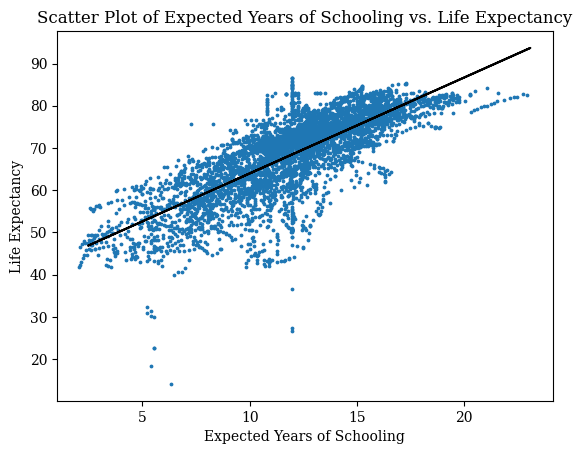

In [22]:
y_pred = reg.predict(X_test[['expected_years_of_schooling']])

# Scatter plot
plt.scatter(X_train_filled_new[['expected_years_of_schooling']], y_train[y_col[0]], s=3)
plt.xlabel('Expected Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Expected Years of Schooling vs. Life Expectancy')

plt.plot(X_test_filled_new[['expected_years_of_schooling']], y_pred, color='black')

In [23]:
y_pred.shape
#y_test[y_col[0]].shape


(1242, 1)

In [24]:
y_pred = y_pred.flatten()

correlation = np.corrcoef(y_pred, y_test[y_col[0]])[0, 1]
mse = mean_squared_error(y_test[y_col[0]], y_pred)

print(f"correlation: {correlation}, mse: {mse}")

correlation: 0.7805408833733228, mse: 35.13385167331427


### Spearman Correlation to assess monotonic and non-linear relationship (Q3)

In [25]:
corrs_sm = {x: X_train[x].corr(y_train[y_col[0]], method='spearman') for x in x_col}
corrs_sm_df = pd.DataFrame.from_dict(corrs_sm, orient='index', columns=['Spearman Correlation'])
corrs_sm_df = corrs_sm_df.sort_values(by='Spearman Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs_sm = corrs_sm_df[(corrs_sm_df['Spearman Correlation'] >= 0.5) | (corrs_sm_df['Spearman Correlation']<= -0.5)]
halfs_sm

,Spearman Correlation
human_development_index,0.928500
median_age_as_of_july_1st_years,0.862968
gross_national_income_per_capita_2017_ppp,0.862426
expected_years_of_schooling_female,0.837628
expected_years_of_schooling_male,0.812609
expected_years_of_schooling,0.800528
material_footprint_per_capita_tonnes,0.778640
co2_emissions_per_capita_tonnes,0.753853
mean_years_of_schooling_female,0.745417
mean_years_of_schooling,0.737145


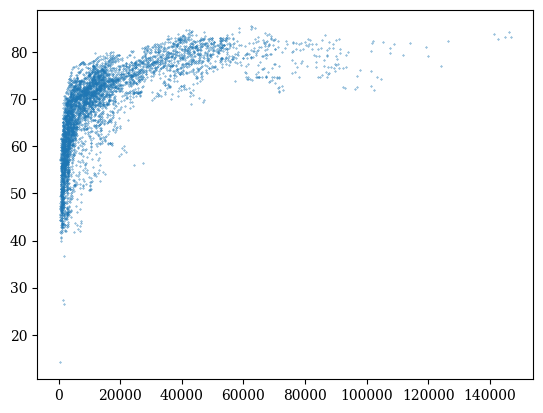

In [26]:
variable = 'gross_national_income_per_capita_2017_ppp'

# test log transformation for a linear relationship
X_train[f"{variable}_log"] = np.log(X_train[variable])

plt.scatter(X_train[variable], y_train, s=0.1)
plt.show()

In [27]:
corr_old = halfs.loc[variable]['Pearson Correlation']
corr_new = X_train[f"{variable}_log"].corr(y_train[y_col[0]], method='pearson')
print(f""" 
    Variable: {variable}
    Pearson Correlation (old): {corr_old}
    Pearson Correlation (new): {corr_new}
""")

 
    Variable: gross_national_income_per_capita_2017_ppp
    Pearson Correlation (old): 0.6498319595423837
    Pearson Correlation (new): 0.8315956495896554



### Multiple Linear Regression (Q4)

In [28]:
new_corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in X_train.columns}
new_corrs_df = pd.DataFrame.from_dict(new_corrs, orient='index', columns=['Pearson Correlation'])
new_corrs_df = new_corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
new_halfs = new_corrs_df[(new_corrs_df['Pearson Correlation'] >= 0.5) | (new_corrs_df['Pearson Correlation']<=-0.5)]
new_halfs

,Pearson Correlation
human_development_index,0.918225
gross_national_income_per_capita_2017_ppp_log,0.831596
expected_years_of_schooling_female,0.819319
expected_years_of_schooling_male,0.789534
median_age_as_of_july_1st_years,0.787636
expected_years_of_schooling,0.780353
mean_years_of_schooling_female,0.745772
mean_years_of_schooling,0.736279
mean_years_of_schooling_male,0.723730
female_population_with_some_secondary_education,0.687381


In [30]:
# Creating variable subsets
positive_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] > 0.75]
negative_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] < -0.75]
absolute_corr_variables = [index for index, row in new_halfs.iterrows() if abs(row['Pearson Correlation']) > 0.70]